***Online Payment Fraud Detection using Machine Learning in Python***

**Importing Libraries and Datasets**

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [ ]:
from google.colab import files
df=files.upload()

Saving online.csv to online.csv


In [ ]:
data=pd.read_csv("online.csv")
data

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,1,PAYMENT,9839.64,C1231006815,170136.00,160296.36,M1979787155,0.0,0.0,0,0
1,1,PAYMENT,1864.28,C1666544295,21249.00,19384.72,M2044282225,0.0,0.0,0,0
2,1,TRANSFER,181.00,C1305486145,181.00,0.00,C553264065,0.0,0.0,1,0
3,1,CASH_OUT,181.00,C840083671,181.00,0.00,C38997010,21182.0,0.0,1,0
4,1,PAYMENT,11668.14,C2048537720,41554.00,29885.86,M1230701703,0.0,0.0,0,0
...,...,...,...,...,...,...,...,...,...,...,...
6035,6,PAYMENT,8800.31,C1958731110,21772.00,12971.69,M1875372072,0.0,0.0,0,0
6036,6,PAYMENT,552.85,C648660703,12971.69,12418.84,M753027610,0.0,0.0,0,0
6037,6,PAYMENT,3952.88,C649913869,15077.00,11124.12,M1995103322,0.0,0.0,0,0
6038,6,PAYMENT,2855.16,C513635174,11124.12,8268.96,M546392117,0.0,0.0,0,0


In [ ]:
data.head()

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,1,PAYMENT,9839.64,C1231006815,170136.0,160296.36,M1979787155,0.0,0.0,0,0
1,1,PAYMENT,1864.28,C1666544295,21249.0,19384.72,M2044282225,0.0,0.0,0,0
2,1,TRANSFER,181.00,C1305486145,181.0,0.00,C553264065,0.0,0.0,1,0
3,1,CASH_OUT,181.00,C840083671,181.0,0.00,C38997010,21182.0,0.0,1,0
4,1,PAYMENT,11668.14,C2048537720,41554.0,29885.86,M1230701703,0.0,0.0,0,0


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6040 entries, 0 to 6039
Data columns (total 11 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   step            6040 non-null   int64  
 1   type            6040 non-null   object 
 2   amount          6040 non-null   float64
 3   nameOrig        6040 non-null   object 
 4   oldbalanceOrg   6040 non-null   float64
 5   newbalanceOrig  6040 non-null   float64
 6   nameDest        6040 non-null   object 
 7   oldbalanceDest  6040 non-null   float64
 8   newbalanceDest  6040 non-null   float64
 9   isFraud         6040 non-null   int64  
 10  isFlaggedFraud  6040 non-null   int64  
dtypes: float64(5), int64(3), object(3)
memory usage: 519.2+ KB


In [ ]:
data.describe()

,step,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
count,6040.000000,6.040000e+03,6.040000e+03,6.040000e+03,6.040000e+03,6.040000e+03,6040.000000,6040.0
mean,2.515397,9.804888e+04,9.470206e+05,9.676081e+05,9.234013e+05,1.067748e+06,0.008609,0.0
std,1.749154,2.879880e+05,2.185762e+06,2.227248e+06,2.604063e+06,2.962788e+06,0.092394,0.0
min,1.000000,3.750000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,0.0
25%,1.000000,3.737477e+03,4.595000e+02,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,0.0
50%,2.000000,1.073881e+04,2.403250e+04,1.511766e+04,0.000000e+00,0.000000e+00,0.000000,0.0
75%,4.000000,1.007702e+05,2.104390e+05,2.188311e+05,3.075077e+05,2.179641e+05,0.000000,0.0
max,6.000000,1.000000e+07,1.290000e+07,1.300000e+07,1.950000e+07,1.920000e+07,1.000000,0.0


In [ ]:
data.isnull().sum()

step              0
type              0
amount            0
nameOrig          0
oldbalanceOrg     0
newbalanceOrig    0
nameDest          0
oldbalanceDest    0
newbalanceDest    0
isFraud           0
isFlaggedFraud    0
dtype: int64

**Data Visualization**

In [ ]:
data['step'].value_counts()

1    2708
2    1014
5     665
4     565
3     552
6     536
Name: step, dtype: int64

Text(0.5, 1.0, 'Distribution of transaction amount')

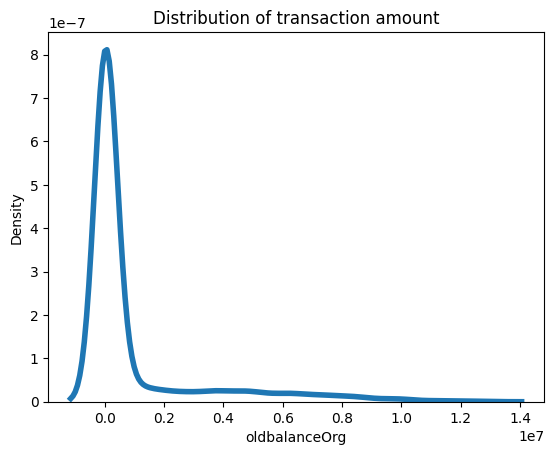

In [ ]:
sns.kdeplot(data['oldbalanceOrg'], linewidth=4)
plt.title('Distribution of transaction amount')

Text(0.5, 1.0, 'Distribution of transaction amount')

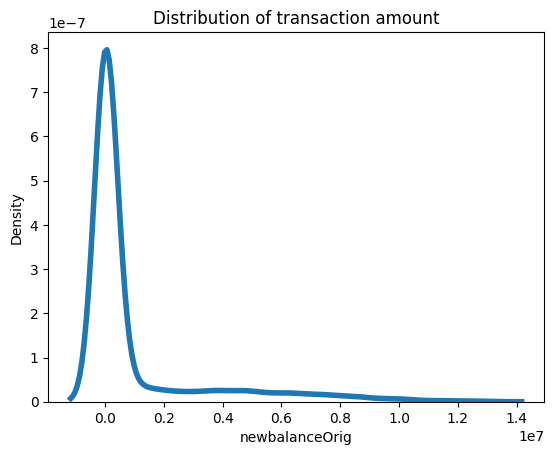

In [ ]:
sns.kdeplot(data['newbalanceOrig'], linewidth=4)
plt.title('Distribution of transaction amount')

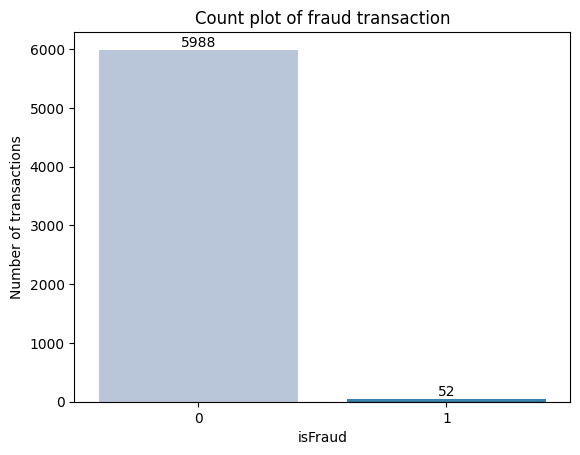

In [ ]:
ax = sns.countplot(x='isFraud', data=data, palette='PuBu')
for container in ax.containers:
    ax.bar_label(container)
plt.title('Count plot of fraud transaction')
plt.ylabel('Number of transactions')

del ax

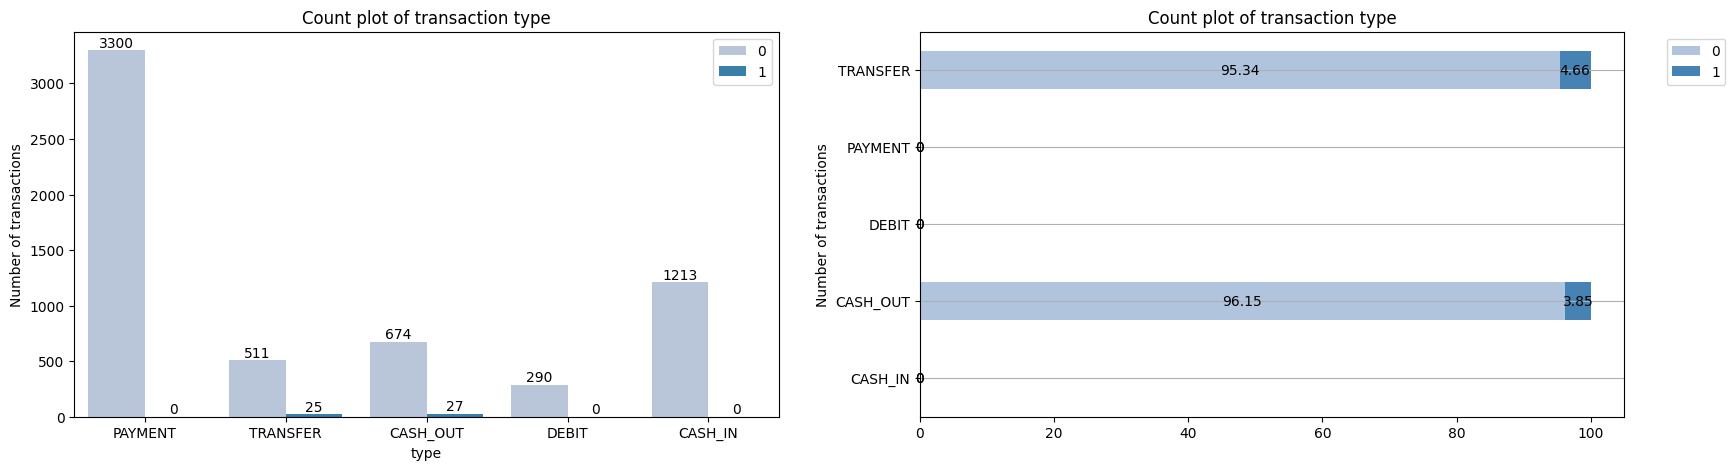

In [ ]:
fig, ax = plt.subplots(1,2,figsize=(20,5))

sns.countplot(x='type', data=data, hue='isFraud', palette='PuBu', ax=ax[0])
for container in ax[0].containers:
    ax[0].bar_label(container)
ax[0].set_title('Count plot of transaction type')
ax[0].legend(loc='best')
ax[0].set_ylabel('Number of transactions')

df2 = data.groupby(['type', 'isFraud']).size().unstack()
df2.apply(lambda x : round(x/sum(x)*100, 2), axis=1).plot(kind='barh', stacked=True, color=['lightsteelblue', 'steelblue'], ax=ax[1])
for container in ax[1].containers:
    ax[1].bar_label(container, label_type='center')
ax[1].set_title('Count plot of transaction type')
ax[1].legend(bbox_to_anchor=(1.05,1), loc='upper left')
ax[1].set_ylabel('Number of transactions')
ax[1].grid(axis='y')

Text(0, 0.5, 'Number of transactions')

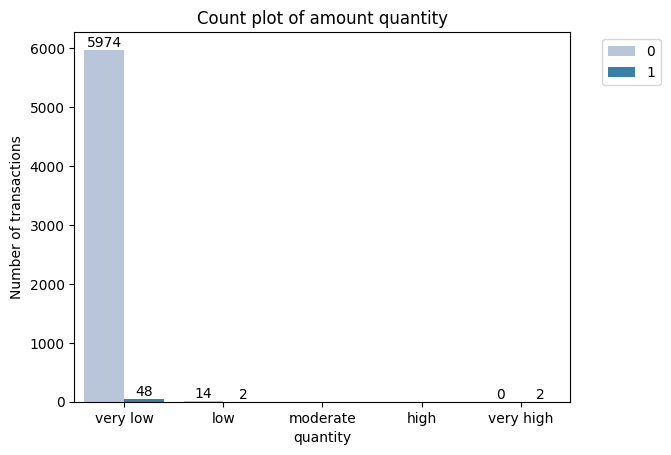

In [ ]:
data['quantity'] = pd.cut(data['amount'], 5, labels=['very low', 'low', 'moderate', 'high', 'very high'])

ax = sns.countplot(x='quantity', data=data, hue='isFraud', palette='PuBu')
for container in ax.containers:
    ax.bar_label(container)
plt.title('Count plot of amount quantity')
plt.legend(bbox_to_anchor=(1.05,1), loc='upper left')
plt.ylabel('Number of transactions')

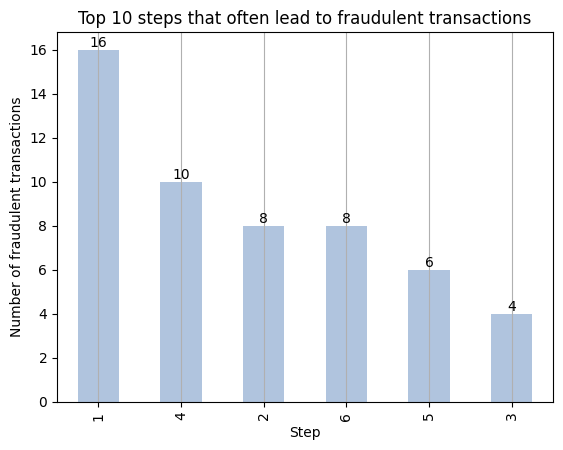

In [ ]:
df1 = data[data['isFraud']==1]
df2 = df1['step'].value_counts().head(10)
ax = df2.plot(kind='bar', color='lightsteelblue')
for container in ax.containers:
    ax.bar_label(container)
plt.title('Top 10 steps that often lead to fraudulent transactions')
plt.ylabel('Number of fraudulent transactions')
plt.xlabel('Step')
plt.grid(axis='x')

del ax, df2

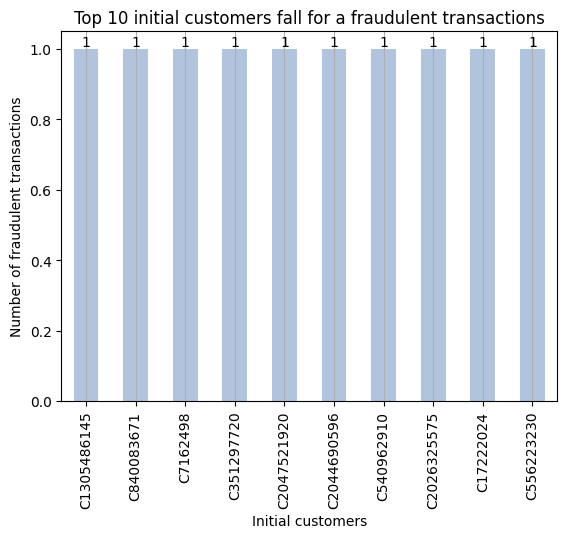

In [ ]:
df2 = df1['nameOrig'].value_counts().head(10)
ax = df2.plot(kind='bar', color='lightsteelblue')
for container in ax.containers:
    ax.bar_label(container)
plt.title('Top 10 initial customers fall for a fraudulent transactions')
plt.ylabel('Number of fraudulent transactions')
plt.xlabel('Initial customers')
plt.grid(axis='x')

del ax, df2

<ipython-input-58-3234b16b7766>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr_matrix = data.corr('spearman')


Text(0.5, 1.0, 'Correlation')

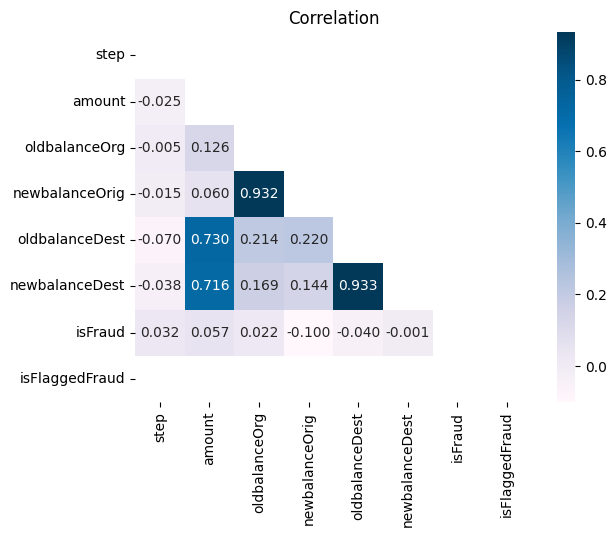

In [ ]:
corr_matrix = data.corr('spearman')
sns.heatmap(corr_matrix, cbar=True, annot=True, mask = np.triu(np.ones_like(corr_matrix, dtype = bool)), fmt='.3f', cmap='PuBu')
plt.title('Correlation')

In [ ]:
obj = (data.dtypes == 'object')
object_cols = list(obj[obj].index)
print("Categorical variables:", len(object_cols))

int_ = (data.dtypes == 'int')
num_cols = list(int_[int_].index)
print("Integer variables:", len(num_cols))

fl = (data.dtypes == 'float')
fl_cols = list(fl[fl].index)
print("Float variables:", len(fl_cols))


Categorical variables: 3
Integer variables: 3
Float variables: 5


<Axes: xlabel='type', ylabel='count'>

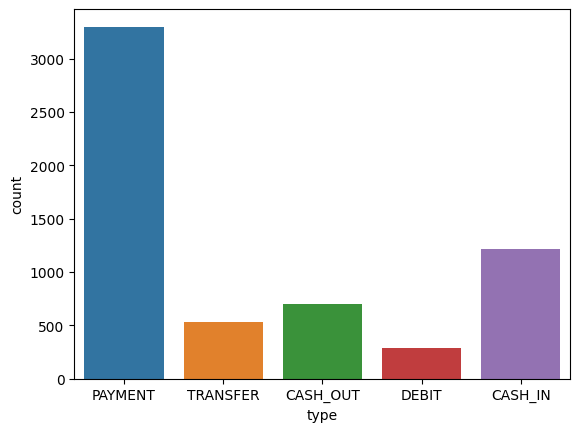

In [ ]:
sns.countplot(x='type', data=data)

<Axes: xlabel='type', ylabel='amount'>

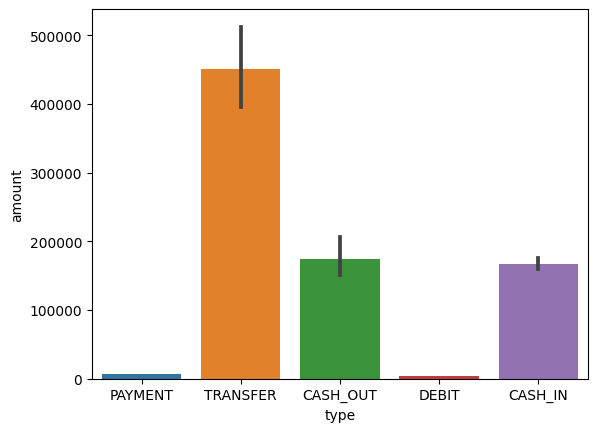

In [ ]:
sns.barplot(x='type', y='amount', data=data)

In [ ]:
data['isFraud'].value_counts()

0    5988
1      52
Name: isFraud, dtype: int64

<Axes: xlabel='step', ylabel='Density'>

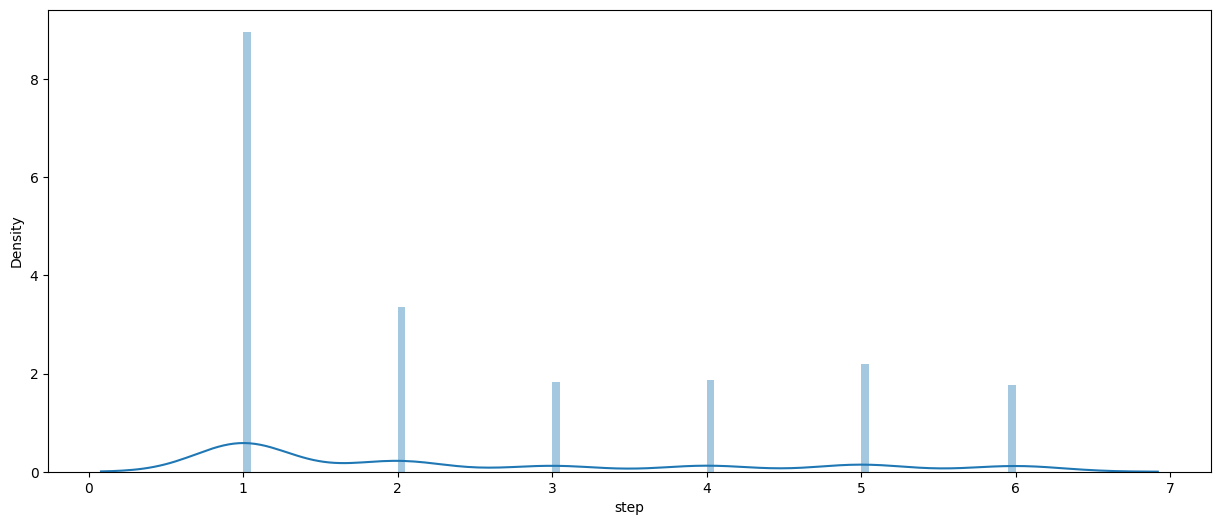

In [ ]:
import warnings
warnings.filterwarnings("ignore")
plt.figure(figsize=(15,6))
sns.distplot(data['step'],bins=100)

<Axes: xlabel='step', ylabel='Density'>

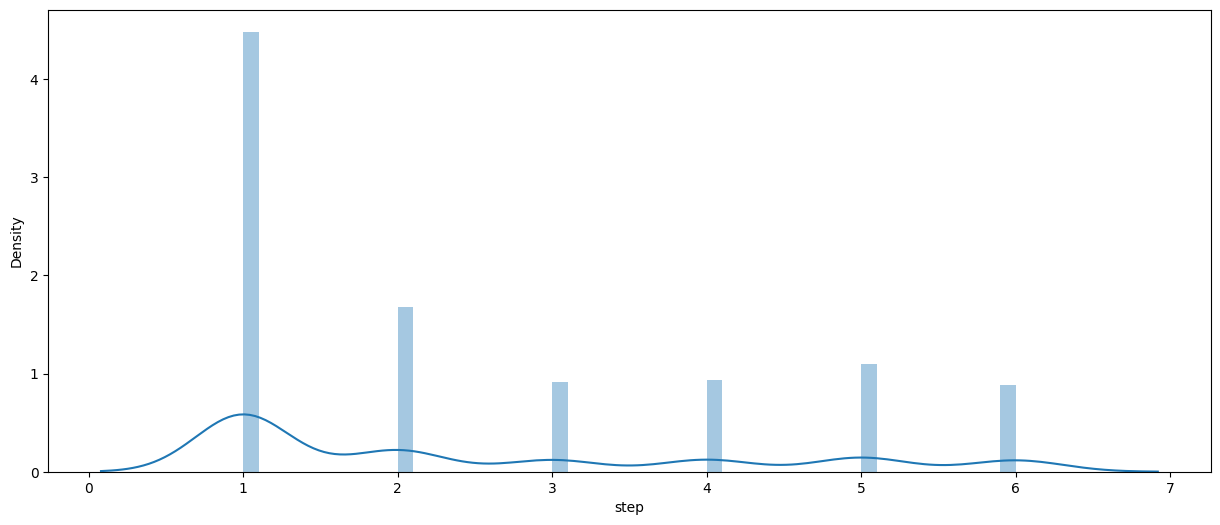

In [ ]:
plt.figure(figsize=(15, 6))
sns.distplot(data['step'], bins=50)

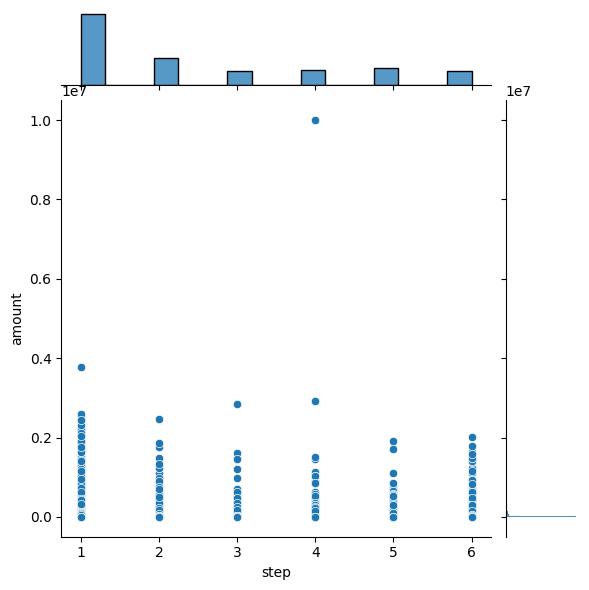

In [ ]:
sns.jointplot(x='step',y='amount',data=data)

<Axes: xlabel='amount', ylabel='step'>

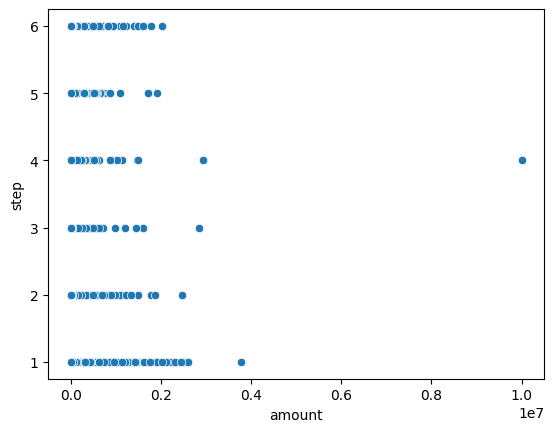

In [ ]:
sns.scatterplot(x=data["amount"], y=data["step"])

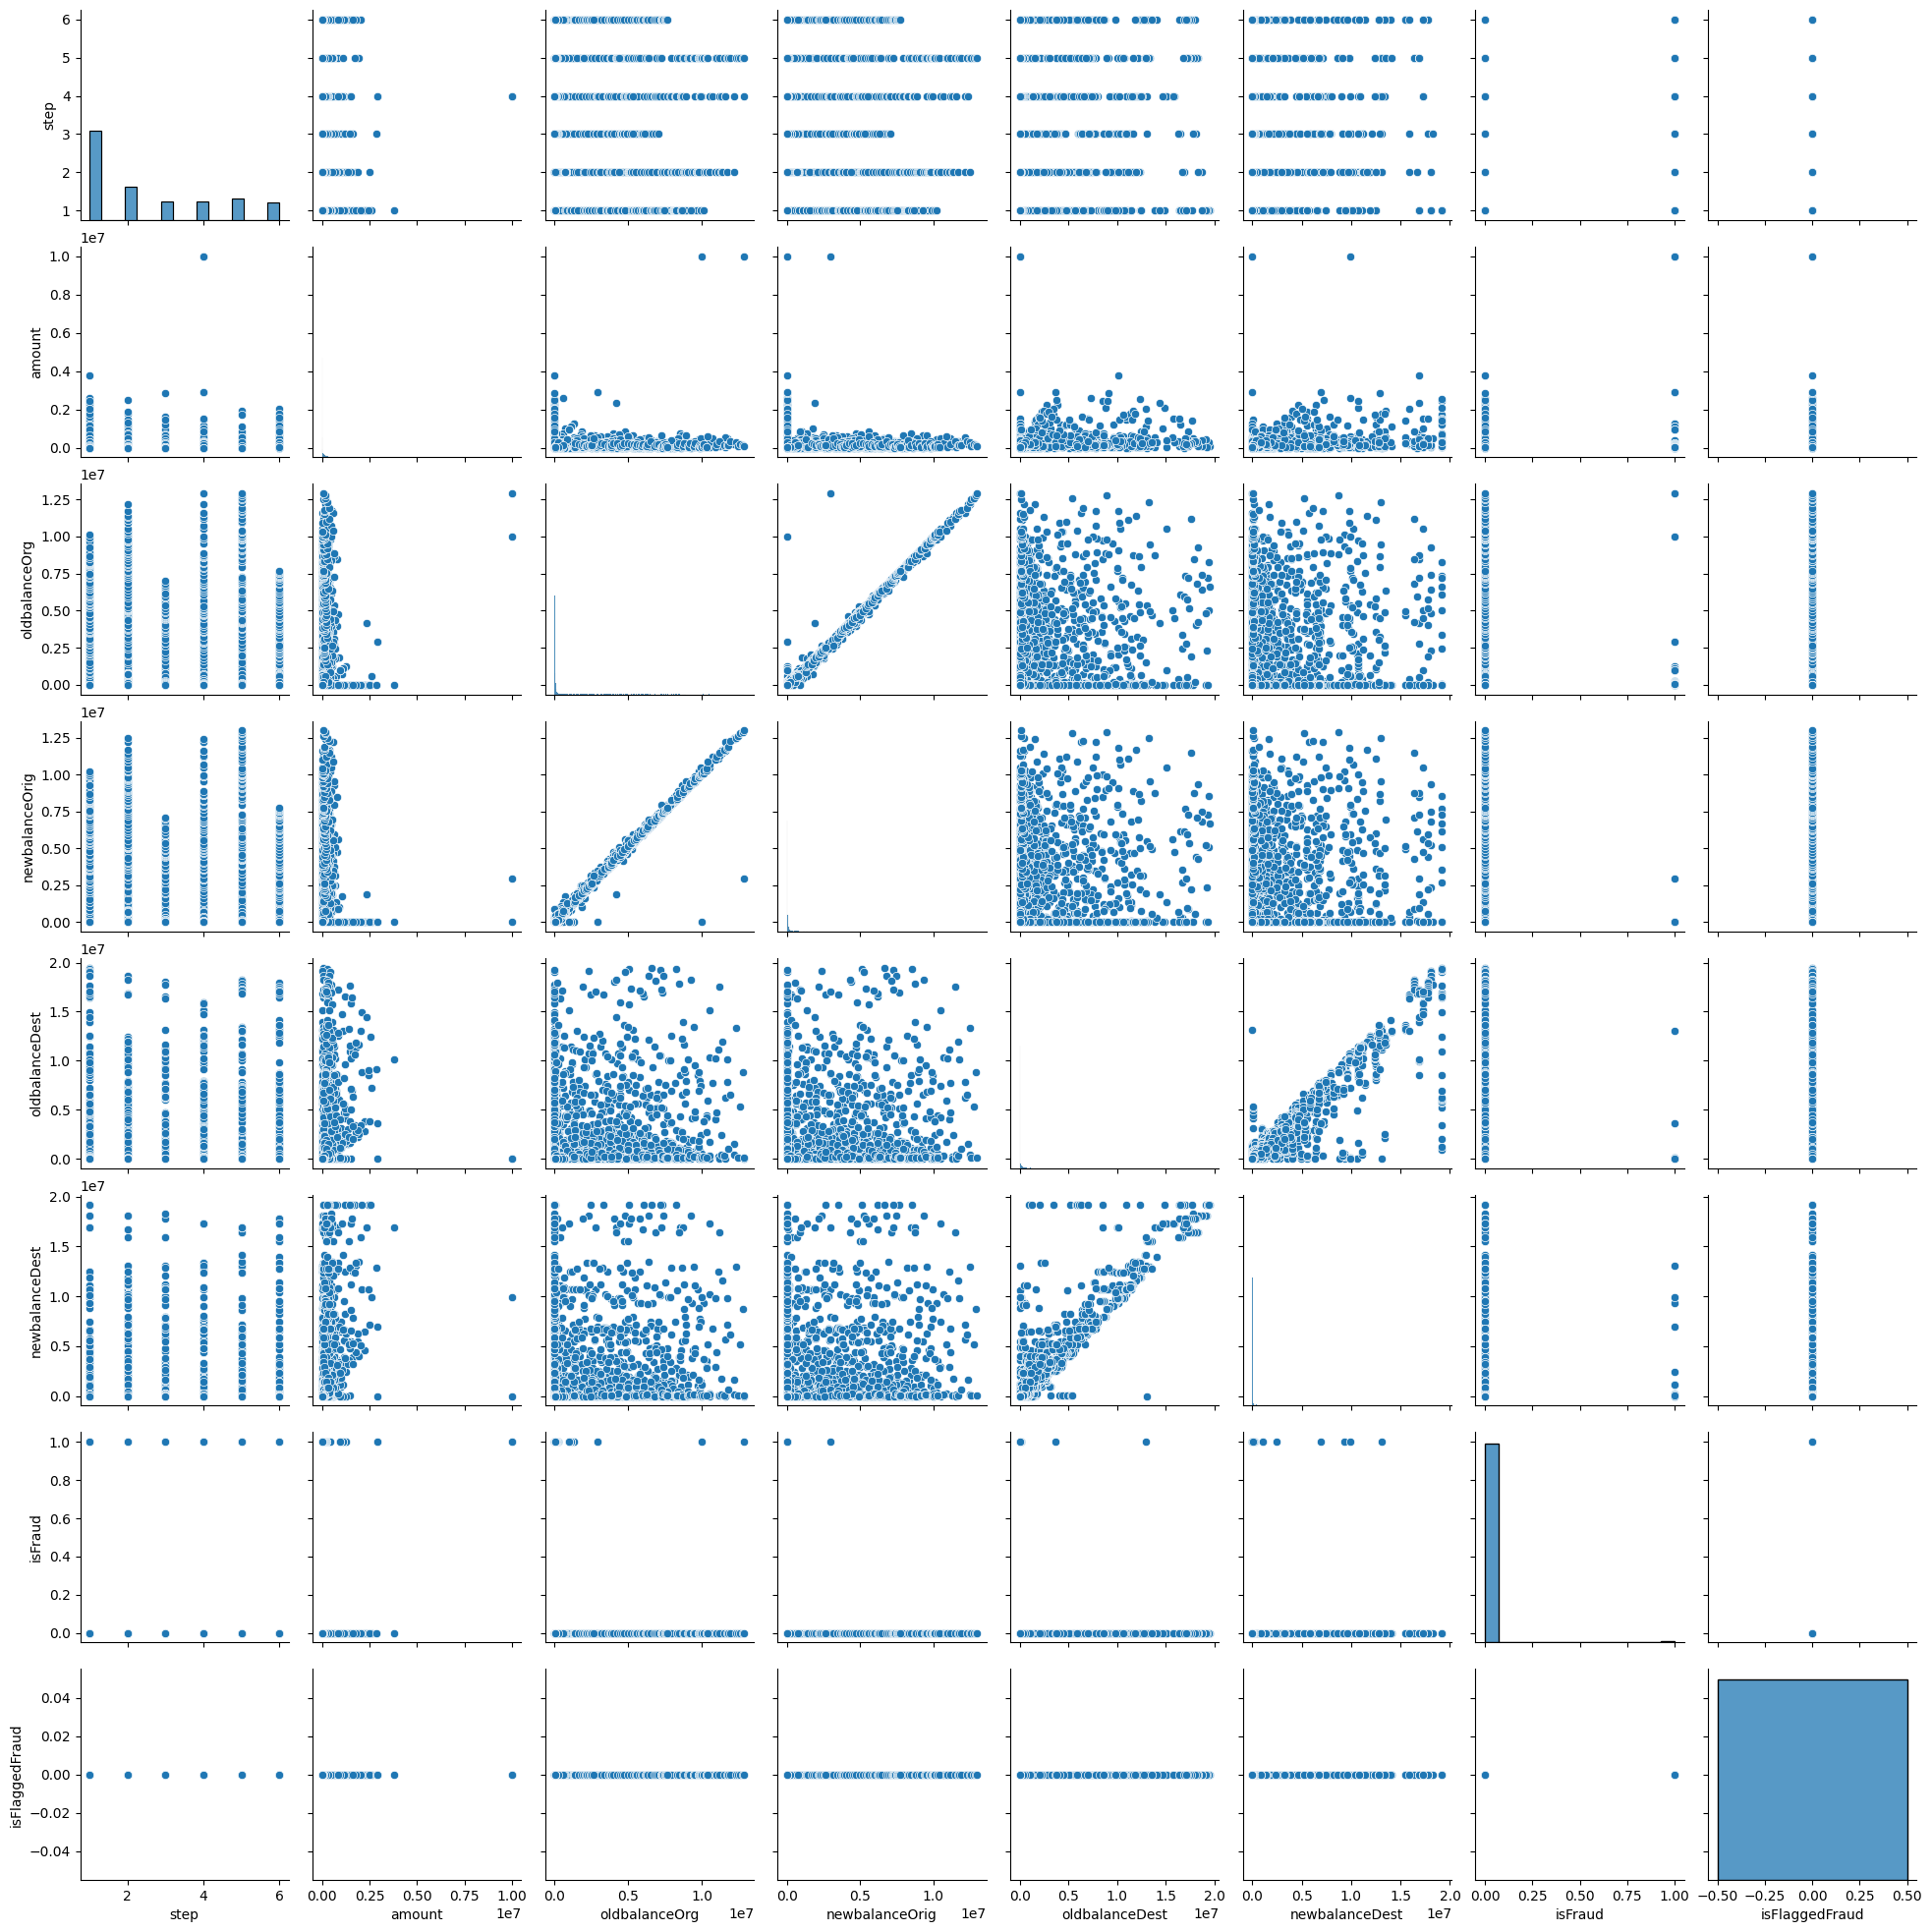

In [ ]:
sns.pairplot(data)

<Axes: xlabel='amount', ylabel='Count'>

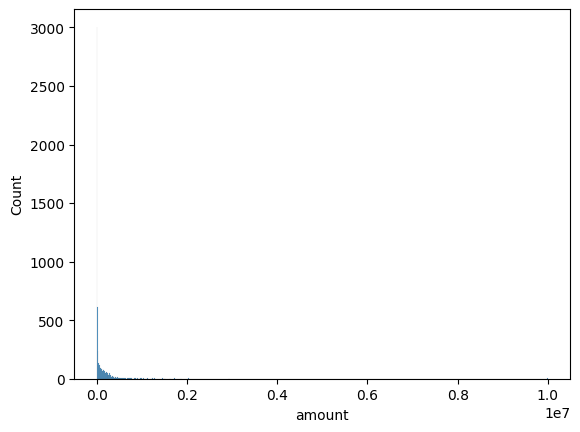

In [ ]:
sns.histplot(x= "amount", data =data)

<Axes: >

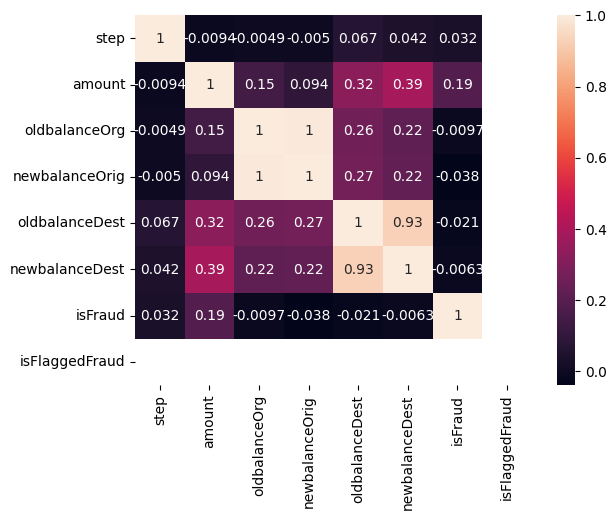

In [ ]:
corel= data.corr()
sns.heatmap(corel, annot =True)

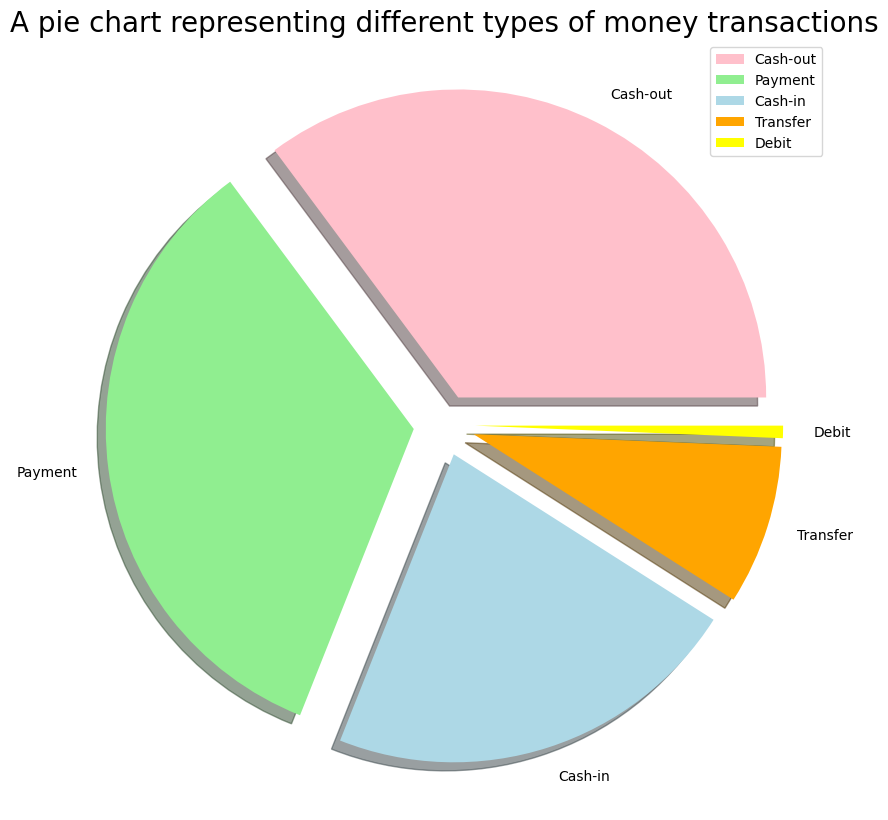

In [ ]:
labels = ['Cash-out', 'Payment', 'Cash-in', 'Transfer', 'Debit']
size = [2237500, 2151495, 1399284, 532909, 41432]
colors = ['pink', 'lightgreen', 'lightblue', 'orange', 'yellow']
explode = [0.1, 0.1, 0.1, 0.1, 0.1]

plt.rcParams['figure.figsize'] = (10, 10)
plt.pie(size, colors = colors, explode = explode, labels = labels, shadow = True)
plt.title('A pie chart representing different types of money transactions', fontsize = 20)
plt.axis('off')
plt.legend()
plt.show()

<Axes: xlabel='oldbalanceDest'>

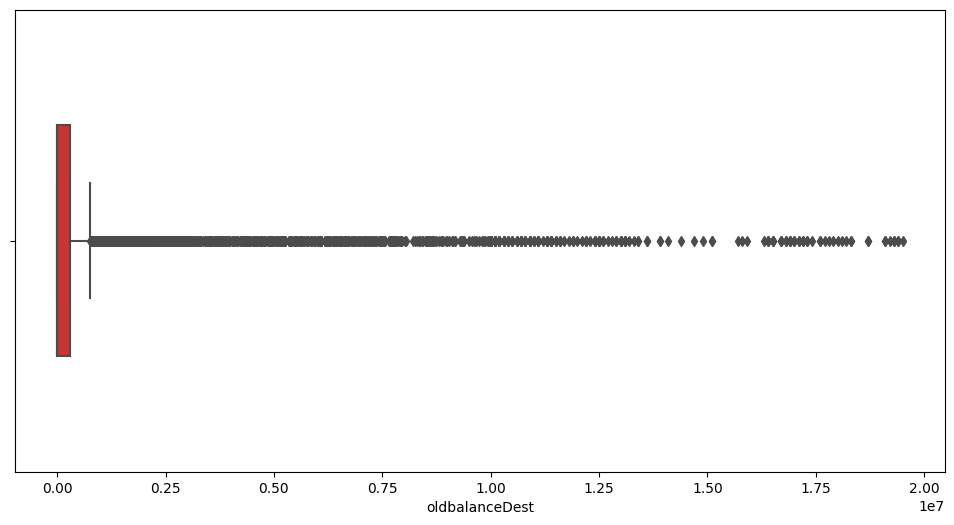

In [ ]:
plt.figure(figsize=(12,6))
sns.boxplot(x=data['oldbalanceDest'],palette='Set1',width=0.5)

**Data Preprocessing**

In [ ]:
type_new = pd.get_dummies(data['type'], drop_first=True)
data_new = pd.concat([data, type_new], axis=1)
data_new.head()

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud,CASH_OUT,DEBIT,PAYMENT,TRANSFER
0,1,PAYMENT,9839.64,C1231006815,170136.0,160296.36,M1979787155,0.0,0.0,0,0,0,0,1,0
1,1,PAYMENT,1864.28,C1666544295,21249.0,19384.72,M2044282225,0.0,0.0,0,0,0,0,1,0
2,1,TRANSFER,181.00,C1305486145,181.0,0.00,C553264065,0.0,0.0,1,0,0,0,0,1
3,1,CASH_OUT,181.00,C840083671,181.0,0.00,C38997010,21182.0,0.0,1,0,1,0,0,0
4,1,PAYMENT,11668.14,C2048537720,41554.0,29885.86,M1230701703,0.0,0.0,0,0,0,0,1,0


In [ ]:
X = data_new.drop(['isFraud', 'type', 'nameOrig', 'nameDest'], axis=1)
y = data_new['isFraud']

In [ ]:
X.shape, y.shape

((6040, 11), (6040,))

**Training and Testing**

In [ ]:
from sklearn.model_selection import train_test_split, cross_val_score, cross_val_predict
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier

In [ ]:
from xgboost import XGBClassifier
from sklearn.metrics import roc_auc_score as ras
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier

In [ ]:
X = data[['type','amount','oldbalanceOrg','newbalanceOrig']]
y = data['isFraud']

In [ ]:
y

0       0
1       0
2       1
3       1
4       0
       ..
6035    0
6036    0
6037    0
6038    0
6039    0
Name: isFraud, Length: 6040, dtype: int64

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2)

In [ ]:
X_train.shape

(4832, 11)

In [ ]:
X_test.shape

(1208, 11)

In [ ]:
y_train.shape

(4832,)

In [ ]:
y_test.shape

(1208,)

In [ ]:
LR = LogisticRegression(random_state=42)
KN = KNeighborsClassifier()
DC = DecisionTreeClassifier(random_state=42)
RF = RandomForestClassifier(random_state=42)

In [ ]:
models = [LR,KN,DC,RF]

In [ ]:
def plot_confusion_matrix(y_test,prediction):
    cm_ = confusion_matrix(y_test,prediction)
    plt.figure(figsize = (6,4))
    sns.heatmap(cm_, cmap ='coolwarm', linecolor = 'white', linewidths = 1, annot = True, fmt = 'd')
    plt.title('Confusion Matrix')
    plt.ylabel('True Label')
    plt.xlabel('Predicted Label')
    plt.show()

In [ ]:
from sklearn.metrics import confusion_matrix

In [ ]:
def trainer(model,X_train,y_train,X_test,y_test):
    #fit your model
    model.fit(X_train,y_train)
    #predict on the fitted model
    prediction = model.predict(X_test)
    #print evaluation metric
    print('\nFor {}, Accuracy score is {} \n'.format(model.__class__.__name__,accuracy_score(prediction,y_test)))
    print(classification_report(y_test, prediction)) #use this later
    plot_confusion_matrix(y_test,prediction)


For LogisticRegression, Accuracy score is 0.9668874172185431 

              precision    recall  f1-score   support

           0       1.00      0.97      0.98      1200
           1       0.17      1.00      0.29         8

    accuracy                           0.97      1208
   macro avg       0.58      0.98      0.63      1208
weighted avg       0.99      0.97      0.98      1208



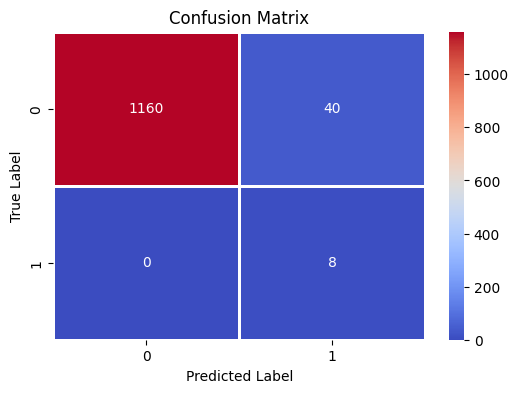


For KNeighborsClassifier, Accuracy score is 0.9950331125827815 

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1200
           1       1.00      0.25      0.40         8

    accuracy                           1.00      1208
   macro avg       1.00      0.62      0.70      1208
weighted avg       1.00      1.00      0.99      1208



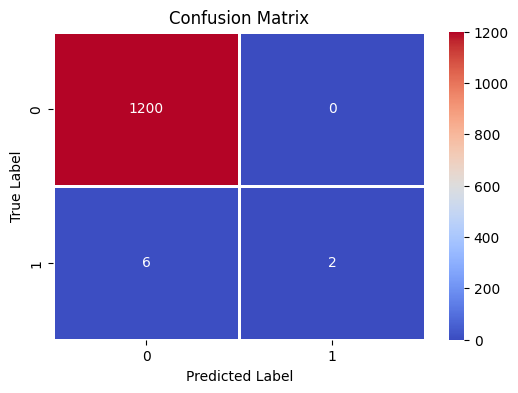


For DecisionTreeClassifier, Accuracy score is 0.9983443708609272 

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1200
           1       0.88      0.88      0.88         8

    accuracy                           1.00      1208
   macro avg       0.94      0.94      0.94      1208
weighted avg       1.00      1.00      1.00      1208



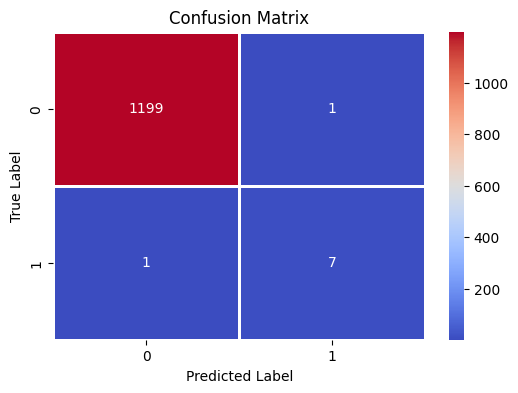


For RandomForestClassifier, Accuracy score is 0.9983443708609272 

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1200
           1       1.00      0.75      0.86         8

    accuracy                           1.00      1208
   macro avg       1.00      0.88      0.93      1208
weighted avg       1.00      1.00      1.00      1208



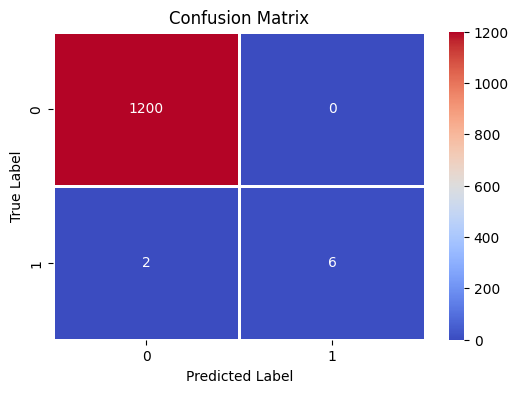

In [ ]:
for model in models:
    trainer(model,X_train,y_train,X_test,y_test)

In [ ]:
from sklearn.model_selection import cross_validate

DC_scores = cross_validate(DC, X_test, y_test, scoring='recall_macro')
print('Decision Tree Recall Cross-Validation:', np.mean(DC_scores['test_score']))

Decision Tree Recall Cross-Validation: 0.7491666666666668


In [ ]:
RF_scores = cross_validate(RF, X_test, y_test, scoring='recall_macro')
print('Random Forest Recall Cross-Validation:', np.mean(RF_scores['test_score']))

Random Forest Recall Cross-Validation: 0.55
